Project Objective:
This project aims to analyze e-commerce data. The objective is to gain insights into customer behavior, and product performance to make strategic decisions that optimize business operations.

Data Structure:

- InvoiceNo: Invoice number, used to identify transactions.
- StockCode: Product code, helps classify and identify products.
- Description: Detailed description of the product, providing additional information about the merchandise.
- Quantity: Quantity of the product in each transaction.
- InvoiceDate: Date of the invoice.
- UnitPrice: Price per unit of the product, supports revenue calculation and profit analysis.
- CustomerID: Customer identifier, used to track individual customer purchasing behavior.
- Country: Customer's country, helps analyze data by geographic region.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

%matplotlib inline
color = sns.color_palette()

In [2]:
pd.set_option('display.max.rows',10000)
pd.set_option('display.max.columns', 100)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hiepdo/test_pandas/refs/heads/develop/data.csv', encoding='ISO-8859-1')
df

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
# change the column names
df.rename(columns={'InvoiceNo': 'invoice_num',
                   'StockCode' : 'stock_code',
                   'Description' : 'description',
                   'Quantity' : 'quantity',
                   'InvoiceDate' : 'invoice_date',
                   'UnitPrice' : 'unit_price',
                   'CustomerID' : 'customer_id',
                   'Country' : 'country'}, inplace=True)

df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# remove duplicates
df = df.drop_duplicates()
df.reset_index(drop = True, inplace = True)
df

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# check missing values for each column
df.isnull().sum().sort_values(ascending = False)

customer_id     135037
description       1454
stock_code           0
invoice_num          0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [ ]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
605,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1407,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1408,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1409,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1410,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [ ]:
# remove null values
df['description'] = df['description'].apply(lambda x: '' if pd.isnull(x) else x)
df['customer_id'] = df['customer_id'].apply(lambda x: '' if pd.isnull(x) else int(x))

# check missing values for each column
df.isnull().sum().sort_values(ascending = False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [ ]:
# upper description, country
df['description'] = df.description.str.upper()
df['country'] = df.country.str.upper()

# split 'invoice_date' into 'date' and 'invoice_time'
df[['date', 'invoice_time']] = df['invoice_date'].str.split(' ', expand=True)

# split 'date' into 'invoice_month', 'invoice_day', and 'invoice_year'
df[['invoice_month', 'invoice_day', 'invoice_year']] = df['date'].str.split('/', expand=True)

# split 'invoice_time' into 'hour'
df[['invoice_hour', 'minutes']] = df['invoice_time'].str.split(':', expand=True)

df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,date,invoice_time,invoice_month,invoice_day,invoice_year,invoice_hour,minutes
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,UNITED KINGDOM,12/1/2010,8:26,12,1,2010,8,26
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,UNITED KINGDOM,12/1/2010,8:26,12,1,2010,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,UNITED KINGDOM,12/1/2010,8:26,12,1,2010,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,UNITED KINGDOM,12/1/2010,8:26,12,1,2010,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,UNITED KINGDOM,12/1/2010,8:26,12,1,2010,8,26


In [ ]:
# rearrange columns
df = df[['invoice_num', 'date', 'invoice_month', 'invoice_day', 'invoice_year', 'invoice_hour', 'stock_code', 'description', 'customer_id', 'country', 'quantity', 'unit_price']]
df['revenue'] = df['quantity'].abs() * df['unit_price'].abs()
df

,invoice_num,date,invoice_month,invoice_day,invoice_year,invoice_hour,stock_code,description,customer_id,country,quantity,unit_price,revenue
0,536365,12/1/2010,12,1,2010,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850,UNITED KINGDOM,6,2.55,15.30
1,536365,12/1/2010,12,1,2010,8,71053,WHITE METAL LANTERN,17850,UNITED KINGDOM,6,3.39,20.34
2,536365,12/1/2010,12,1,2010,8,84406B,CREAM CUPID HEARTS COAT HANGER,17850,UNITED KINGDOM,8,2.75,22.00
3,536365,12/1/2010,12,1,2010,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850,UNITED KINGDOM,6,3.39,20.34
4,536365,12/1/2010,12,1,2010,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850,UNITED KINGDOM,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536636,581587,12/9/2011,12,9,2011,12,22613,PACK OF 20 SPACEBOY NAPKINS,12680,FRANCE,12,0.85,10.20
536637,581587,12/9/2011,12,9,2011,12,22899,CHILDREN'S APRON DOLLY GIRL,12680,FRANCE,6,2.10,12.60
536638,581587,12/9/2011,12,9,2011,12,23254,CHILDRENS CUTLERY DOLLY GIRL,12680,FRANCE,4,4.15,16.60
536639,581587,12/9/2011,12,9,2011,12,23255,CHILDRENS CUTLERY CIRCUS PARADE,12680,FRANCE,4,4.15,16.60


ANALYZING DATA

In [ ]:
total_revenue = "{:.2f}".format(df['revenue'].sum())
print("\nTotal revenue:")
print(total_revenue)


Total revenue:
11558214.65


In [ ]:
# Change type of invoice_year
df['invoice_year'] = df['invoice_year'].astype('int64')

# Total revenue by year
revenue_by_year = df.groupby('invoice_year').agg({'revenue' : ['sum']}).sort_index()
revenue_by_year[('revenue', 'sum')] = revenue_by_year[('revenue', 'sum')].round(2)
print(revenue_by_year)

                  revenue
                      sum
invoice_year             
2010            896181.85
2011          10662032.80


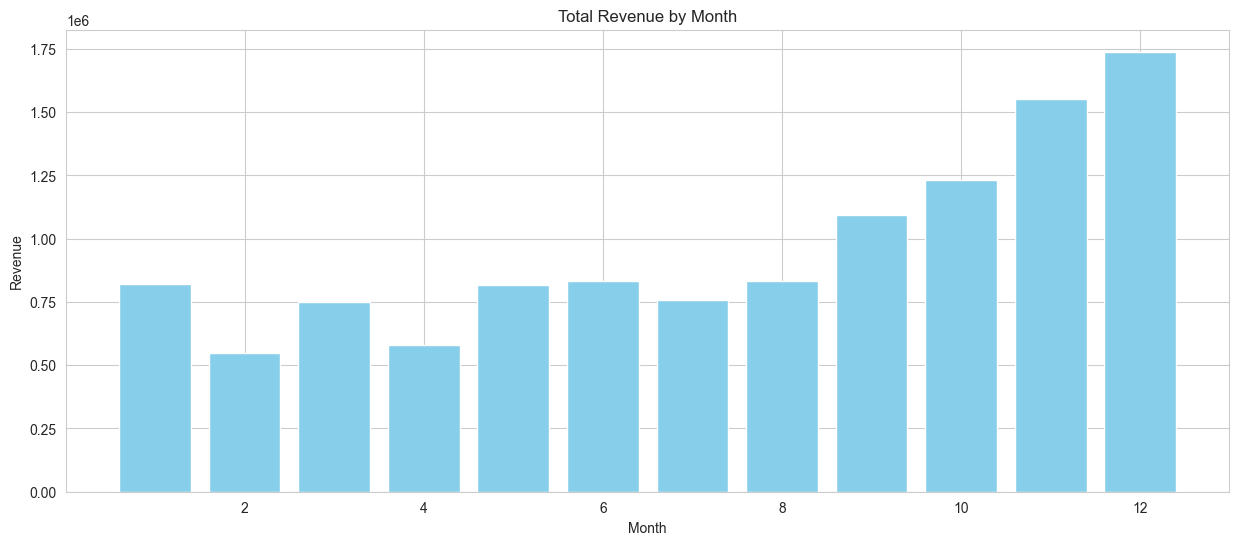

In [ ]:
# Change type of invoice_month
df['invoice_month'] = df['invoice_month'].astype('int64')

# Total revenue by month
revenue_by_month = df.groupby('invoice_month').agg({'revenue' : ['sum']}).sort_index()

# Create bar chart
plt.subplots(figsize=(15,6))
plt.bar(revenue_by_month.index, revenue_by_month[('revenue', 'sum')], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Total Revenue by Month')
plt.show()

In [ ]:
# Top 5 products with the highest revenue
revenue_by_product = df.groupby(['stock_code', 'description']).agg({'revenue' : ['sum']}).round(2).sort_values(by=('revenue', 'sum'), ascending=False)
top_5_products = revenue_by_product.head(5)
print(top_5_products)

                                          revenue
                                              sum
stock_code description                           
23843      PAPER CRAFT , LITTLE BIRDIE  336939.20
AMAZONFEE  AMAZON FEE                   249042.68
M          MANUAL                       224534.73
DOT        DOTCOM POSTAGE               206252.06
22423      REGENCY CAKESTAND 3 TIER     183853.59


In [ ]:
# Top 5 countries with the highest revenue
revenue_by_country = df.groupby('country').agg({'revenue' : ['sum']}).round(2).sort_values(by=('revenue', 'sum'), ascending=False)
top_5_countries = revenue_by_country.head(5)
print(top_5_countries)

                   revenue
                       sum
country                   
UNITED KINGDOM  9836360.00
EIRE             303287.66
NETHERLANDS      286231.14
GERMANY          235847.33
FRANCE           221933.63


In [ ]:
total_orders = df['invoice_num'].nunique()
print("\nTotal orders:")
print(total_orders)


Total orders:
25900


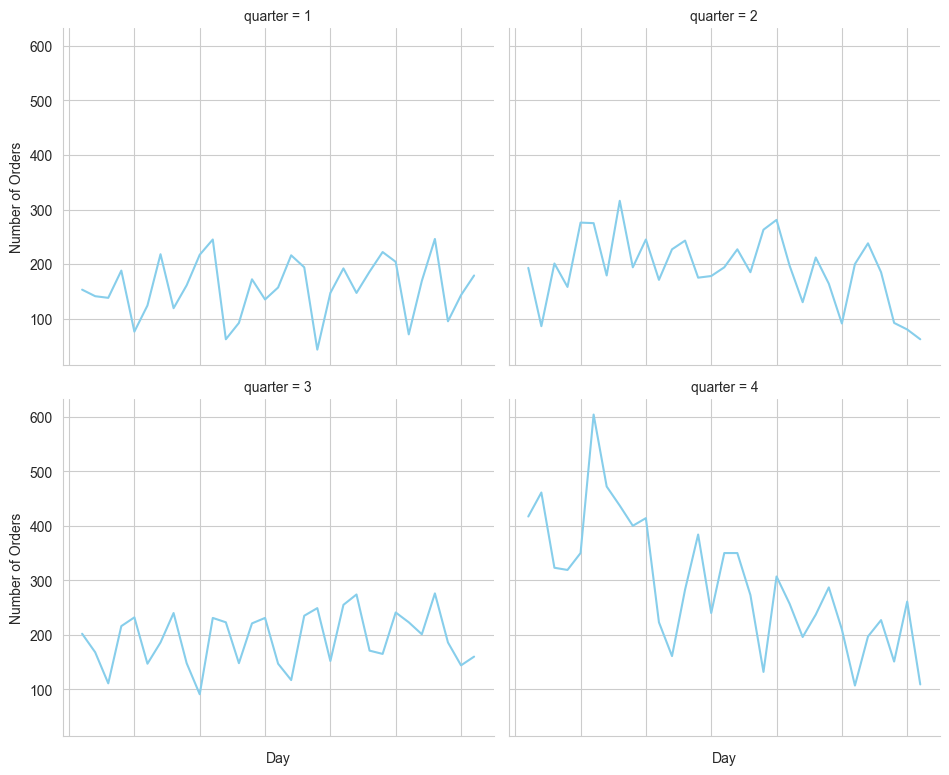

In [ ]:
# Change type of invoice_day
df['invoice_day'] = df['invoice_day'].astype('int64')

# Create quarter column
df['date'] = pd.to_datetime(df['date'])
df['quarter'] = df['date'].dt.quarter

# Total number of orders by day
orders_by_day = df.groupby(['invoice_day', 'quarter']).agg({'invoice_num': 'nunique'}).reset_index()

# Create bar chart
new_fg = sns.FacetGrid(data=orders_by_day, col="quarter", col_wrap=2, height=4, aspect=1.2, margin_titles=True)
new_fg.map(sns.lineplot, 'invoice_day', 'invoice_num', color="skyblue")
new_fg.set_axis_labels("Day", "Number of Orders")

for ax in new_fg.axes.flat:
    ax.set_xticklabels([])
    ax.set_xlabel("Day")


In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a mapping for days of the week
day_map = {
    0: 'MON',
    1: 'TUE',
    2: 'WED',
    3: 'THU',
    4: 'FRI',
    5: 'SAT',
    6: 'SUN'
}

df['day_of_week'] = df['date'].dt.dayofweek.map(day_map)
df

,invoice_num,date,invoice_month,invoice_day,invoice_year,invoice_hour,stock_code,description,customer_id,country,quantity,unit_price,revenue,quarter,day_of_week
0,536365,2010-12-01,12,1,2010,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850,UNITED KINGDOM,6,2.55,15.30,4,WED
1,536365,2010-12-01,12,1,2010,8,71053,WHITE METAL LANTERN,17850,UNITED KINGDOM,6,3.39,20.34,4,WED
2,536365,2010-12-01,12,1,2010,8,84406B,CREAM CUPID HEARTS COAT HANGER,17850,UNITED KINGDOM,8,2.75,22.00,4,WED
3,536365,2010-12-01,12,1,2010,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850,UNITED KINGDOM,6,3.39,20.34,4,WED
4,536365,2010-12-01,12,1,2010,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850,UNITED KINGDOM,6,3.39,20.34,4,WED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536636,581587,2011-12-09,12,9,2011,12,22613,PACK OF 20 SPACEBOY NAPKINS,12680,FRANCE,12,0.85,10.20,4,FRI
536637,581587,2011-12-09,12,9,2011,12,22899,CHILDREN'S APRON DOLLY GIRL,12680,FRANCE,6,2.10,12.60,4,FRI
536638,581587,2011-12-09,12,9,2011,12,23254,CHILDRENS CUTLERY DOLLY GIRL,12680,FRANCE,4,4.15,16.60,4,FRI
536639,581587,2011-12-09,12,9,2011,12,23255,CHILDRENS CUTLERY CIRCUS PARADE,12680,FRANCE,4,4.15,16.60,4,FRI


<Figure size 1500x600 with 0 Axes>

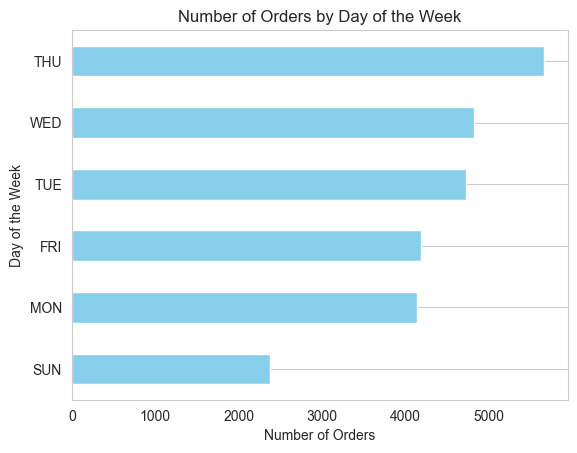

In [ ]:
# Total number of orders by day of week
orders_by_day_of_week = df.groupby('day_of_week').agg({'invoice_num' : ['nunique']}).sort_values(by = ('invoice_num', 'nunique'))

# Plot a horizontal bar chart
plt.figure(figsize=(15, 6))
orders_by_day_of_week.plot(kind='barh', color='skyblue')
plt.gca().get_legend().remove() if plt.gca().get_legend() else None
plt.xlabel('Number of Orders')
plt.ylabel('Day of the Week')
plt.title('Number of Orders by Day of the Week')
plt.grid(axis='x')
plt.show()

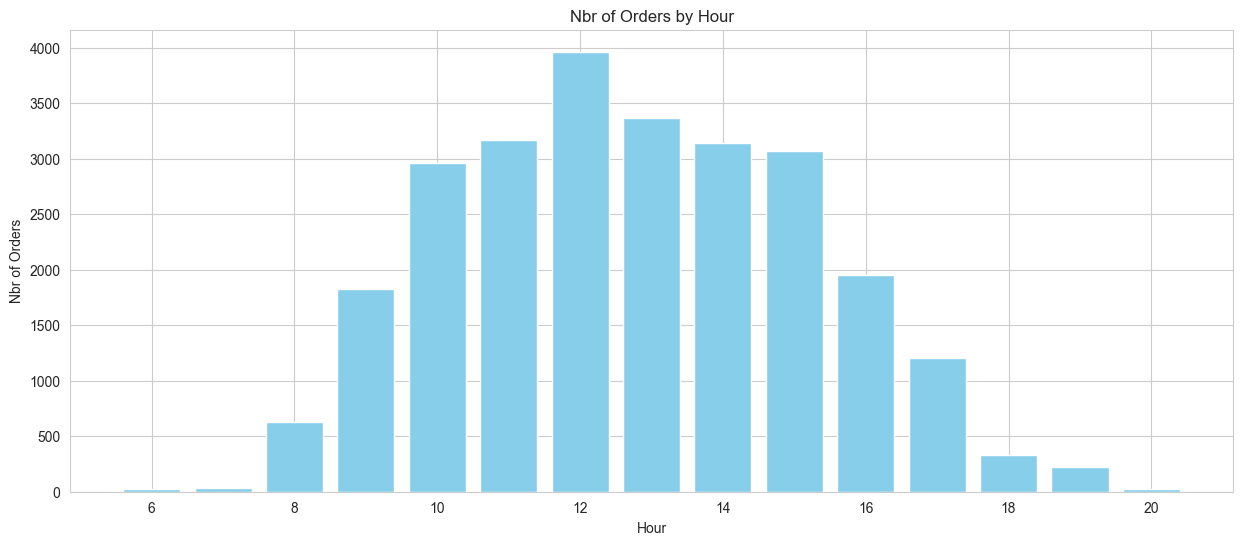

In [ ]:
# Change type of invoice_hour
df['invoice_hour'] = df['invoice_hour'].astype('int64')

# Total number of orders by hour
orders_by_hour = df.groupby('invoice_hour').agg({'invoice_num' : ['nunique']}).sort_index()

# Create bar chart
plt.subplots(figsize=(15,6))
plt.bar(orders_by_hour.index, orders_by_hour[('invoice_num', 'nunique')], color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Nbr of Orders')
plt.title('Nbr of Orders by Hour')
plt.show()

In [ ]:
# Best seller
best_seller = df.groupby(['stock_code', 'description']).agg({'invoice_num' : ['nunique']}).sort_values(by = ('invoice_num', 'nunique'), ascending=False)
best_seller = best_seller.head(1)
print(best_seller)

                                              invoice_num
                                                  nunique
stock_code description                                   
85123A     WHITE HANGING HEART T-LIGHT HOLDER        2235


In [ ]:
# Ratio between new customers and old customers
total_orders_by_customer = df.groupby('customer_id').agg({'invoice_num' : ['nunique']}).reset_index()

new_customers = total_orders_by_customer[total_orders_by_customer[('invoice_num', 'nunique')] == 1]
total_new_customers = new_customers['customer_id'].count()

old_customers = total_orders_by_customer[total_orders_by_customer[('invoice_num', 'nunique')] > 1]
total_old_customers = old_customers['customer_id'].count()

Ratio = total_new_customers / total_old_customers
Ratio

np.float64(0.4290849673202614)

In [ ]:
top_markets = df.groupby('country').agg({'invoice_num': ['nunique'], 
                                          'revenue' : ['sum']}).round(2).sort_values(by = ('invoice_num', 'nunique'), ascending=False)

top_markets = top_markets.iloc[0:5]

print("\nCountry with most orders:")
print(top_markets)


Country with most orders:
               invoice_num     revenue
                   nunique         sum
country                               
UNITED KINGDOM       23494  9836360.00
GERMANY                603   235847.33
FRANCE                 461   221933.63
EIRE                   360   303287.66
BELGIUM                119    41481.72


In [ ]:
# Identify potential markets
top_markets['avg_revenue_per_order'] = (top_markets[('revenue', 'sum')] / top_markets[('invoice_num', 'nunique')]).round(2)

print("\nPotential markets:")
print(top_markets)


Potential markets:
               invoice_num     revenue avg_revenue_per_order
                   nunique         sum                      
country                                                     
UNITED KINGDOM       23494  9836360.00                418.68
GERMANY                603   235847.33                391.12
FRANCE                 461   221933.63                481.42
EIRE                   360   303287.66                842.47
BELGIUM                119    41481.72                348.59


KEY INSIGHTS AND RECOMMENDATIONS:

* December records the highest revenue.

* Customer Behavior: Increased purchases at the beginning of the months of the 4th quarter, likely due to preparation for big holidays at the end of the year such as Thanksgiving, Christmas, and New Year. Action: Implement early-month promotions and enhance social media ads.

* Peak Orders on Thursdays: Likely due to weekend preparation. Action: Offer special deals on Thursdays and optimize systems for high order volumes.

* No Transactions on Saturdays: Action: Increase Saturday promotions and run targeted marketing campaigns to boost transactions.

* Peak Orders at Noon: Customers often shop during lunch breaks. Action: Introduce special lunchtime offers.

* Customer Ratio: 0.43 indicates strong new customer acquisition but needs to improve retention strategies.

* Opportunity: Besides the UNITED KINGDOM, consider expanding into EIRE, which, being fourth in order volume, ranks third in revenue and has the highest average order value.